In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:

names1880 = pd.read_csv('C:/Users/HP/Analysing the naming trends using python/Analysing the naming trends using python_data/yob1880.txt',names=['name','sex','births'])

In [16]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [18]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [28]:
years=range(1880,2020)
pieces=[]
columns=['name', 'sex', 'births']
for year in years:
    path="C:/Users/HP/Analysing the naming trends using python/Analysing the naming trends using python_data/yob%d.txt" % year
    frame=pd.read_csv(path, names=columns)
    frame['year']=year
    pieces.append(frame)

names=pd.concat(pieces,ignore_index=True)

In [31]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [24]:
names.shape

(1989401, 4)

In [44]:
total_births=names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [46]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


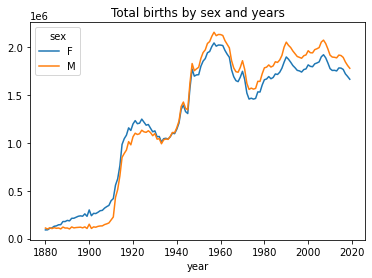

In [51]:
total_births.plot(title="Total births by sex and years");

In [53]:
def add_prop(group):
    group['prop']=group.births/group.births.sum()
    return group
names=names.groupby(['year','sex']).apply(add_prop)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989396,Zyheem,M,5,2019,0.000003
1989397,Zykel,M,5,2019,0.000003
1989398,Zyking,M,5,2019,0.000003
1989399,Zyn,M,5,2019,0.000003


In [63]:
def get_top1000(group):
    return group.sort_values(by = 'births',ascending = False)[:1000]
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace = True, drop = True)

In [64]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births',index = 'year', columns = 'name', aggfunc = sum)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

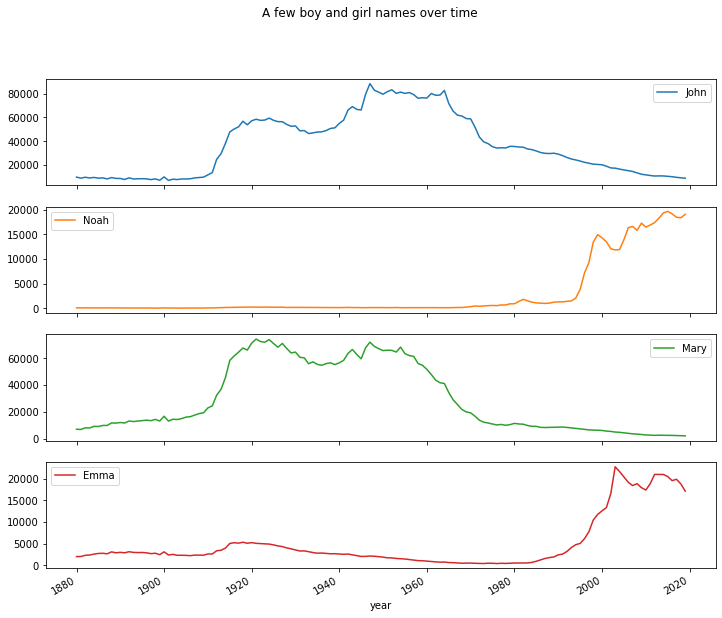

In [65]:
subset = total_births[['John','Noah','Mary','Emma']]
subset.plot(subplots = True, figsize = (12,10), grid = False, 
            title = 'A few boy and girl names over time')